# Bounding Box of the Object

Trying to decide the bounding box of the object.

In NeuS2, we can only scale and shift the cameras to make the objects captured by the camera in the unit cube. We need to determine how to scale and shift the cameras.

Todo: write a bounding box around the object, and it can be scaled and shifted together with the cameras.

# Raw Data `data.json`
Load json data from `data.json`

In [53]:
from pathlib import Path
import json
import numpy as np

In [48]:
input_json_file = Path("./single_frame.json")

In [50]:
with open(input_json_file, "r") as infile:
    json_data = json.load(infile)

# Camera Extrinsics

From `data.json`, we can get all the camera extrinsics in Python list format. It's generated by Ego4d scripts.

There are 5 keys that are relevant to camera intrinsics, I need to figure out the meaning of each: 

* `center`: Camera center coordinate in world frame
* `T_device_world`: Tansformation matrix from world to device
* `T_world_device`: Transformation matrix from device to world
* `T_device_camera`: For the 5 gopro camera views, this is identity matrix. For the 3 Aria views, this is not identity matrix
* `T_camera_device`: For the 5 gopro camera views, this is identity matrix. For the 3 Aria views, this is not identity matrix


In [94]:
all_cameras = ["gp01_0", "gp02_0", "gp03_0", "gp04_0", "gp05_0"]
for camera in all_cameras:
    print(json_data[camera]["camera_data"].keys())

dict_keys(['name', 'center', 'T_device_world', 'T_world_device', 'T_device_camera', 'T_camera_device', 'camera_type', 'device_row'])
dict_keys(['name', 'center', 'T_device_world', 'T_world_device', 'T_device_camera', 'T_camera_device', 'camera_type', 'device_row'])
dict_keys(['name', 'center', 'T_device_world', 'T_world_device', 'T_device_camera', 'T_camera_device', 'camera_type', 'device_row'])
dict_keys(['name', 'center', 'T_device_world', 'T_world_device', 'T_device_camera', 'T_camera_device', 'camera_type', 'device_row'])
dict_keys(['name', 'center', 'T_device_world', 'T_world_device', 'T_device_camera', 'T_camera_device', 'camera_type', 'device_row'])


In [95]:
# Transfomration from world to camera
gp01_T_wc = np.array(json_data["gp01_0"]["camera_data"]["T_device_world"])
gp02_T_wc = np.array(json_data["gp02_0"]["camera_data"]["T_device_world"])
gp03_T_wc = np.array(json_data["gp03_0"]["camera_data"]["T_device_world"])
gp04_T_wc = np.array(json_data["gp04_0"]["camera_data"]["T_device_world"])
gp05_T_wc = np.array(json_data["gp05_0"]["camera_data"]["T_device_world"])
ariaRGB_T_wc = np.array(json_data["aria01_rgb"]["camera_data"]["T_device_world"])

In [96]:
# Transfomration from camera to world
gp01_T_cw = np.array(json_data["gp01_0"]["camera_data"]["T_world_device"])
gp02_T_cw = np.array(json_data["gp02_0"]["camera_data"]["T_world_device"])
gp03_T_cw = np.array(json_data["gp03_0"]["camera_data"]["T_world_device"])
gp04_T_cw = np.array(json_data["gp04_0"]["camera_data"]["T_world_device"])
gp05_T_cw = np.array(json_data["gp05_0"]["camera_data"]["T_world_device"])
ariaRGB_T_cw = np.array(json_data["aria01_rgb"]["camera_data"]["T_world_device"])

# Extract camera positions and axis

Let's only look at the camera gp01. All the matrices below will be referring to those of gp01!

# Transformation Matrix

## Transformation matrix from camera to world

In [86]:
print(gp01_T_cw)

[[ 0.7721709   0.32109128 -0.54831795  1.2042    ]
 [ 0.63522726 -0.36910906  0.67841382 -2.393708  ]
 [ 0.01544374 -0.87215788 -0.48898123  0.360359  ]
 [ 0.          0.          0.          1.        ]]


## Transformation matrix from world to camera

In [87]:
print(gp01_T_wc)

[[ 0.77217094  0.63522709  0.01544363  0.58513466]
 [ 0.32109128 -0.3691088  -0.87215744 -0.95590701]
 [-0.54831774  0.67841341 -0.48898094  2.46041653]
 [ 0.          0.          0.          1.        ]]


## Sanity Check on Transformation Matrix

In [85]:
# Sanity check
# T_wc and T_cw should be inverse of each other!
# Result should be identity matrix
print(np.round(gp01_T_wc @ gp01_T_cw))

[[ 1.  0. -0.  0.]
 [ 0.  1.  0. -0.]
 [-0. -0.  1.  0.]
 [ 0.  0.  0.  1.]]


# Rotation Matrix

## Rotation matrix from camera to world
It's inside the Transformation matrix from camera to world!

In [88]:
# Rotation matrix from camera to world
R_cw = gp01_T_cw[:3, :3]
print(R_cw)

[[ 0.7721709   0.32109128 -0.54831795]
 [ 0.63522726 -0.36910906  0.67841382]
 [ 0.01544374 -0.87215788 -0.48898123]]


## Rotation matrix from world to camera
It's inside the Transformation matrix from world to camera!

In [89]:
# Rotation matrix from world to camera
R_wc = gp01_T_wc[:3, :3]
print(R_wc)

[[ 0.77217094  0.63522709  0.01544363]
 [ 0.32109128 -0.3691088  -0.87215744]
 [-0.54831774  0.67841341 -0.48898094]]


## Sanity Check on Rotation matrix

In [90]:
# Sanity check
# R_cw and R_wc should be inverse of each other!
# Result should be identity matrix
print(np.round(R_cw @ R_wc))

[[ 1. -0.  0.]
 [-0.  1.  0.]
 [ 0. -0.  1.]]


In [91]:
# Sanity check
# R_cw and R_wc should be transpose of each other!
# Result should be all 0's
print(np.round(R_cw.T - R_wc))

[[-0.  0.  0.]
 [ 0. -0. -0.]
 [-0.  0. -0.]]


# Translation Vector

### Translation vector from camera to world
It's inside Transformation matrix from world to camera!

In [92]:
# Transformation matrix from world to camera
# Last column is actually the translation vector from camera's origin to world's origin!
# Notation: t_wc = t_w^c = translation from c to w = w coordinate in frame c
t_wc = gp01_T_wc[:3, -1]
print(t_wc)

[ 0.58513466 -0.95590701  2.46041653]


### Translation vector from world to camera
It's inside Transformation matrix from camera to world!

(This is what we need to get camera origin in the world frame!!!)



In [93]:
# Transformation matrix from camera to world
# Last column is actually the translation vector from world's origin to camera's origin!
# Notation: t_cw = t_c^w = translation from w to c = c coordinate in frame w
t_cw = gp01_T_cw[:3, -1]
print(t_cw)

[ 1.2042   -2.393708  0.360359]


## Sanity Check on Translation Vector

Relationship between translation from world to camera $t_c^w$ and translation from camera to world $t_w^c$:

$$ t_c^w = -R_c^w t_w^c $$
$$ t_w^c = -R_w^c t_c^w $$

In [100]:
# t_cw and t_wc should satisfy above equation:
# Result should be all 0's
print(np.round(t_cw - (-R_cw @ t_wc)))

[ 0.  0. -0.]


In [101]:
# t_wc and t_cw should satisfy above equation:
# Result should be all 0's
print(np.round(t_wc - (-R_wc @ t_cw)))

[ 0. -0.  0.]


# Camera Origins in World Frame

## Using Transformation from world to camera

Camera origin in the World frame: 
$ -(R_w^c)^{-1} t_w^c $, where 
* $R_w^c$ is the Rotation matrix from world to camera `T_wc[:3, :3]`
* $t_w^c$ is the Translation vector from camera to world `T_wc[:3, -1]`


So Camera origin in the World frame: `-np.linalg.inv(T_wc[:3, :3]) @ T_wc[:3, -1]`

In [105]:
camera_origin_1 = -np.linalg.inv(gp01_T_wc[:3, :3]) @ gp01_T_wc[:3, -1]
print(camera_origin_1)

[ 1.2042   -2.393708  0.360359]


## Using Transformation from camera to world

Camera origin in the World frame: $t_c^w$, i.e.
* the translation from world's origin to camera's origin
* camera origin coordinate in the world's frame
  
So Camera origin in the World frame: `t_cw`

In [106]:
camera_origin_2 = t_cw
print(camera_origin_2)

[ 1.2042   -2.393708  0.360359]


## Sanity Check on Camera Origin in World Frame

In [109]:
# Sanity check
# camera_origin_1 and camera_origin_2 should be equal
# Result should be all 0's
print(np.round(camera_origin_1 - camera_origin_2))

[ 0. -0.  0.]


## Origins of all the GoPro Cameras in World Frame

In [172]:
gp01_pos = gp01_T_cw[:3, -1]
gp02_pos = gp02_T_cw[:3, -1]
gp03_pos = gp03_T_cw[:3, -1]
gp04_pos = gp04_T_cw[:3, -1]
gp05_pos = gp05_T_cw[:3, -1]
ariaRGB_pos = ariaRGB_T_cw[:3, -1]

print(gp01_pos)
print(gp02_pos)
print(gp03_pos)
print(gp04_pos)
print(gp05_pos)
print(ariaRGB_pos)


[ 1.2042   -2.393708  0.360359]
[ 0.48447  -2.527351  0.607054]
[-0.488663 -1.991669  0.588011]
[-0.681661 -1.111523  0.320905]
[ 0.39679  -1.684496  0.741955]
[ 0.675133 -1.565832  0.15521 ]


### Visualization

In [117]:
from mpl_toolkits import mplot3d

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt

In [139]:
all_points = [gp01_pos, gp02_pos, gp03_pos, gp04_pos, gp05_pos]

{(0, 0, 0): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x7f9331097ac0>}

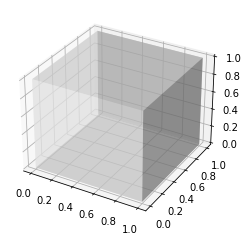

In [174]:
axes = [1, 1, 1]
data = np.ones(axes, dtype=bool)
alpha = 0.5
colors = np.empty(axes + [4], dtype=np.float32)
colors[:] = [1, 1, 1, alpha]  # red

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.voxels(data, facecolors=colors)


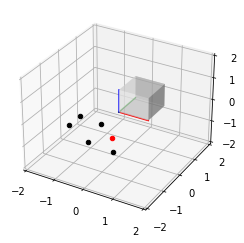

In [223]:
axes = [1, 1, 1]
data = np.ones(axes, dtype=bool)
alpha = 0.5
colors = np.empty(axes + [4], dtype=np.float32)
colors[:] = [1, 1, 1, alpha]  # red

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

ax.voxels(data, facecolors=colors)

# Draw world xyz-axis
x_w = np.linspace(0, 1, 100)
y_w = np.linspace(0, 1, 100)
z_w = np.linspace(0, 1, 100)
ax.plot3D(x_w, 0*x_w, 0*x_w, c='red')
ax.plot3D(0*y_w, y_w, 0*y_w, c='green')
ax.plot3D(0*z_w, 0*z_w, z_w, c='blue')


for point in all_points:
    ax.scatter(point[0], point[1], point[2], c='black')

ax.scatter(ariaRGB_pos[0], ariaRGB_pos[1], ariaRGB_pos[2], c='red')


# Camera Directions in World Frame

* x-axis of the Camera frame in the World frame: first column of T_cw, i.e. `T_cw[:3, 0]`
* y-axis of the Camera frame in the World frame: second column of T_cw, i.e. `T_cw[:3, 1]`
* z-axis of the Camera frame in the World frame: third column of T_cw, i.e. `T_cw[:3, 2]`

In [224]:
x_1 = gp01_T_cw[:3, 0]
x_2 = gp02_T_cw[:3, 0]
x_3 = gp03_T_cw[:3, 0]
x_4 = gp04_T_cw[:3, 0]
x_5 = gp05_T_cw[:3, 0]
x_a = ariaRGB_T_cw[:3, 0]

y_1 = gp01_T_cw[:3, 1]
y_2 = gp02_T_cw[:3, 1]
y_3 = gp03_T_cw[:3, 1]
y_4 = gp04_T_cw[:3, 1]
y_5 = gp05_T_cw[:3, 1]
y_a = ariaRGB_T_cw[:3, 1]

z_1 = gp01_T_cw[:3, 2]
z_2 = gp02_T_cw[:3, 2]
z_3 = gp03_T_cw[:3, 2]
z_4 = gp04_T_cw[:3, 2]
z_5 = gp05_T_cw[:3, 2]
z_a = ariaRGB_T_cw[:3, 2]

## Sanity check on xyz-axis directions

In [225]:
print(gp05_T_cw)

[[-0.8635833   0.48893466  0.12315637  0.39679   ]
 [ 0.50253153  0.85453813  0.1312505  -1.684496  ]
 [-0.04106891  0.17523564 -0.98366996  0.741955  ]
 [ 0.          0.          0.          1.        ]]


In [213]:
print(x_5)

[-0.8635833   0.50253153 -0.04106891]


In [214]:
print(y_5)

[0.48893466 0.85453813 0.17523564]


In [215]:
print(z_5)

[ 0.12315637  0.1312505  -0.98366996]


In [230]:
print(np.round(x_1 @ y_1))
print(np.round(x_1 @ z_1))
print(np.round(y_1 @ z_1))
print(np.round(x_3 @ y_3))
print(np.round(x_3 @ z_3))
print(np.round(y_3 @ z_3))
print(np.round(x_5 @ y_5))
print(np.round(x_5 @ z_5))
print(np.round(y_5 @ z_5))


-0.0
0.0
0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0


## Visualization

In [220]:
all_x_axis = [x_1, x_2, x_3, x_4, x_5, x_a]
all_y_axis = [y_1, y_2, y_3, y_4, y_5, y_a]
all_z_axis = [z_1, z_2, z_3, z_4, z_5, z_a]

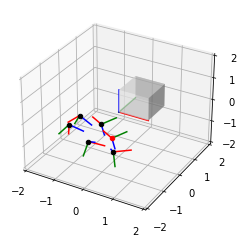

In [222]:
axes = [1, 1, 1]
data = np.ones(axes, dtype=bool)
alpha = 0.5
colors = np.empty(axes + [4], dtype=np.float32)
colors[:] = [1, 1, 1, alpha]  # red

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)

ax.voxels(data, facecolors=colors)

# Draw world xyz-axis
x_w = np.linspace(0, 1, 100)
y_w = np.linspace(0, 1, 100)
z_w = np.linspace(0, 1, 100)
ax.plot3D(x_w, 0*x_w, 0*x_w, c='red')
ax.plot3D(0*y_w, y_w, 0*y_w, c='green')
ax.plot3D(0*z_w, 0*z_w, z_w, c='blue')

for i in range(5):
    point = all_points[i]
    ax.scatter(point[0], point[1], point[2], c='black')

    point_x = point + all_x_axis[i] / (2*np.linalg.norm(all_x_axis[i]))
    ax.plot([point[0], point_x[0]], [point[1], point_x[1]], [point[2], point_x[2]], c='red')

    point_y = point + all_y_axis[i] / (2*np.linalg.norm(all_y_axis[i]))
    ax.plot([point[0], point_y[0]], [point[1], point_y[1]], [point[2], point_y[2]], c='green')

    point_z = point + all_z_axis[i] / (2*np.linalg.norm(all_z_axis[i]))
    ax.plot([point[0], point_z[0]], [point[1], point_z[1]], [point[2], point_z[2]], c='blue')

point = ariaRGB_pos
ax.scatter(point[0], point[1], point[2], c='red')

point_x = point + all_x_axis[i] / (2*np.linalg.norm(all_x_axis[i]))
ax.plot([point[0], point_x[0]], [point[1], point_x[1]], [point[2], point_x[2]], c='red')

point_y = point + all_y_axis[i] / (2*np.linalg.norm(all_y_axis[i]))
ax.plot([point[0], point_y[0]], [point[1], point_y[1]], [point[2], point_y[2]], c='green')

point_z = point + all_z_axis[i] / (2*np.linalg.norm(all_z_axis[i]))
ax.plot([point[0], point_z[0]], [point[1], point_z[1]], [point[2], point_z[2]], c='blue')

# Bounding box around the object

## TODO

Add a boudning box around the object, so we can visualize if the object is fully inside the unit cube after scaling and shifting.

## Deciding the object's size

In [25]:
# Calculate the distances between each camera pairs (except ariaRGB)
distances = {}

distances[(1, 2)] = (np.linalg.norm(gp01_pos - gp02_pos))
print(np.linalg.norm(gp01_pos - gp02_pos))
distances[(1, 3)] = (np.linalg.norm(gp01_pos - gp03_pos))
print(np.linalg.norm(gp01_pos - gp03_pos))
distances[(1, 4)] = (np.linalg.norm(gp01_pos - gp04_pos))
print(np.linalg.norm(gp01_pos - gp04_pos))
distances[(1, 5)] = (np.linalg.norm(gp01_pos - gp05_pos))
print(np.linalg.norm(gp01_pos - gp05_pos))

distances[(2, 3)] = (np.linalg.norm(gp02_pos - gp03_pos))
print(np.linalg.norm(gp02_pos - gp03_pos))
distances[(2, 4)] = (np.linalg.norm(gp02_pos - gp04_pos))
print(np.linalg.norm(gp02_pos - gp04_pos))
distances[(2, 5)] = (np.linalg.norm(gp02_pos - gp05_pos))
print(np.linalg.norm(gp02_pos - gp05_pos))

distances[(3, 4)] = (np.linalg.norm(gp03_pos - gp04_pos))
print(np.linalg.norm(gp03_pos - gp04_pos))
distances[(3, 5)] = (np.linalg.norm(gp03_pos - gp05_pos))
print(np.linalg.norm(gp03_pos - gp05_pos))

distances[(4, 5)] = (np.linalg.norm(gp04_pos - gp05_pos))
print(np.linalg.norm(gp04_pos - gp05_pos))

0.7724831049116866
1.7547780279551028
2.28079519108183
1.1403982095128
1.1109931037868779
1.8564244355604673
0.858073780758974
0.9398142500281637
0.9497794598084337
1.2917576090853886


In [26]:
sorted(distances.items(), key=lambda x:x[1])

[((1, 2), 0.7724831049116866),
 ((2, 5), 0.858073780758974),
 ((3, 4), 0.9398142500281637),
 ((3, 5), 0.9497794598084337),
 ((2, 3), 1.1109931037868779),
 ((1, 5), 1.1403982095128),
 ((4, 5), 1.2917576090853886),
 ((1, 3), 1.7547780279551028),
 ((2, 4), 1.8564244355604673),
 ((1, 4), 2.28079519108183)]